# 提取midi文件中的訊息和時間

In [1]:
import os
import mido
import pretty_midi
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
import IPython.display
import numpy as np
import pandas as pd
from mido import MidiFile
from mido import MetaMessage
from mido import tempo2bpm, bpm2tempo

In [3]:
# 左右手音符都在同一個track，可以用channel=0或channel=1去判斷
def analyzemidi(path=""):
    mid = MidiFile(path)
    txt = path.split('/')
    midiname = txt[-1]

    count1 = 0
    count2 = 0
    final_R_list = []
    final_L_list = []
    
    for i, track in enumerate(mid.tracks):
        print('Track {}: {}'.format(i, midiname))
        passed_time = 0
        passed_time2 = 0

        for info in track:
            if info.type == "set_tempo":
                tempo = info.tempo
                print("Tempo:", tempo)
                print("Bpm:", tempo2bpm(info.tempo))
                print('Ticks_per_beat:', mid.ticks_per_beat)
                print()

        for msg in track:
            '''
            if msg.type == "note_on":
                print(msg)
            #print(count)
            '''
            
            # 把tick單位轉成second單位
            ab_time = mido.tick2second(msg.time, mid.ticks_per_beat, tempo)

            y = ab_time

            # real_time是每一個事件在整個midi文件中的真實時間位置
            real_time = ab_time + passed_time
            passed_time += ab_time
            R_list = []
            
            # channel == 0右手、channel == 1左手
            if msg.type == "note_on":
                channel = msg.channel
                velocity = msg.velocity
                note = msg.note
                # 右手
                if channel == 0:
                    x = passed_time
                    print("note = {0:3}  |  real time = {1:<8}".format(note, round(real_time, 3)))
                    R_list.append(note)
                    R_list.append(real_time)
                    count1 += 1
                    final_R_list.append(R_list)
        
        if count1 != 0:
            print('Midi Length (R):', real_time)
            print('Count1:', count1)
            print()
        
        for msg in track:
            #print(msg)
            #print(count)

            # 把tick單位轉成second單位
            ab_time2 = mido.tick2second(msg.time, mid.ticks_per_beat, tempo)

            y2 = ab_time2

            # real_time是每一個事件在整個midi文件中的真實時間位置
            real_time2 = ab_time2 + passed_time2
            passed_time2 += ab_time2
            L_list = []
            
            # channel == 0右手、channel == 1左手
            if msg.type == "note_on":
                channel = msg.channel
                velocity = msg.velocity
                note = msg.note
                # 左手
                if channel == 1:
                    x2 = passed_time2
                    print("note = {0:3}  |  real time = {1:<8}".format(note, round(real_time2, 3)))
                    L_list.append(note)
                    L_list.append(real_time2)
                    count2 += 1
                    final_L_list.append(L_list)
        
        if count2 != 0:
            print('Midi Length (L):', real_time2)
            print('Count2:', count2)
    
    return final_R_list,final_L_list

In [4]:
analyzemidi('MIDI/20191219_ForTest/ItsMyLife.mid')

Track 0: ItsMyLife.mid
Tempo: 500083
Bpm: 119.98008330617118
Ticks_per_beat: 120

note =  43  |  real time = 0.0     
note =  48  |  real time = 0.0     
note =  43  |  real time = 0.467   
note =  48  |  real time = 0.479   
note =  43  |  real time = 0.5     
note =  48  |  real time = 0.5     
note =  48  |  real time = 0.933   
note =  43  |  real time = 0.942   
note =  43  |  real time = 4.001   
note =  48  |  real time = 4.001   
note =  43  |  real time = 4.451   
note =  48  |  real time = 4.48    
note =  43  |  real time = 4.501   
note =  48  |  real time = 4.501   
note =  48  |  real time = 4.913   
note =  43  |  real time = 4.922   
note =  43  |  real time = 8.001   
note =  48  |  real time = 8.001   
note =  43  |  real time = 8.472   
note =  48  |  real time = 8.476   
note =  43  |  real time = 12.002  
note =  48  |  real time = 12.002  
note =  43  |  real time = 12.485  
note =  48  |  real time = 12.485  
note =  43  |  real time = 12.502  
note =  48  |  rea

note =  41  |  real time = 218.036 
note =  46  |  real time = 218.036 
note =  41  |  real time = 219.903 
note =  46  |  real time = 219.911 
note =  34  |  real time = 220.037 
note =  34  |  real time = 220.112 
note =  34  |  real time = 220.287 
note =  34  |  real time = 220.366 
note =  34  |  real time = 220.537 
note =  34  |  real time = 220.607 
note =  34  |  real time = 220.787 
note =  34  |  real time = 220.862 
note =  35  |  real time = 221.037 
note =  35  |  real time = 221.137 
note =  35  |  real time = 221.287 
note =  35  |  real time = 221.378 
note =  35  |  real time = 221.537 
note =  35  |  real time = 221.641 
note =  35  |  real time = 221.787 
note =  35  |  real time = 221.895 
Midi Length (R): 222.5202655666511
Count1: 940

note =  36  |  real time = 0.0     
note =  36  |  real time = 0.479   
note =  36  |  real time = 0.5     
note =  36  |  real time = 0.933   
note =  36  |  real time = 4.001   
note =  36  |  real time = 4.459   
note =  36  |  r

([[43, 0.0],
  [48, 0.0],
  [43, 0.46674413333333326],
  [48, 0.47924620833333326],
  [43, 0.5000829999999999],
  [48, 0.5000829999999999],
  [48, 0.9334882666666665],
  [43, 0.9418229833333331],
  [43, 4.000664000000001],
  [48, 4.000664000000001],
  [43, 4.450738700000002],
  [48, 4.479910208333336],
  [43, 4.500747000000002],
  [48, 4.500747000000002],
  [48, 4.913315475000001],
  [43, 4.921650191666668],
  [43, 8.001327999999987],
  [48, 8.001327999999987],
  [43, 8.472239491666656],
  [48, 8.47640684999999],
  [43, 12.001991999999984],
  [48, 12.001991999999984],
  [43, 12.48540556666665],
  [48, 12.48540556666665],
  [43, 12.502074999999984],
  [48, 12.502074999999984],
  [48, 12.860467816666649],
  [43, 12.860467816666649],
  [48, 13.002157999999984],
  [43, 13.002157999999984],
  [43, 13.047998941666652],
  [48, 13.047998941666652],
  [43, 13.252199499999985],
  [48, 13.252199499999985],
  [43, 13.285538366666652],
  [48, 13.293873083333319],
  [43, 13.502240999999989],
  [48, 

In [5]:
# 查看midi檔案總長度(回傳MIDI檔案中最後一個元素的時間值)
pm = pretty_midi.PrettyMIDI('MIDI/20191219_ForTest/ItsMyLife.mid')
time = pm.get_end_time()
print('midi檔案總長度:',time)

midi檔案總長度: 222.52026556666664


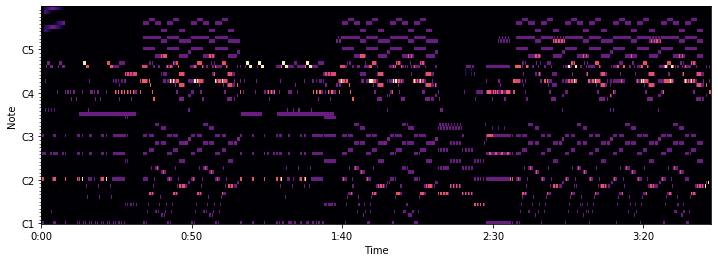

In [6]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # 使用librosa的specshow函式用於顯示piano roll鋼琴卷
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))
plt.figure(figsize=(12, 4))
plot_piano_roll(pm, 24, 84)